# Preprocessing Data

In [1]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


### Load Data Dari File

In [2]:
def loadData(dataset_p, nama_file, tag_dataset, path_data):
  for path, subdirs, files in os.walk(dataset_p):
      for name in files:
          path_data.append(os.path.join(path, name)) 
          tag_dataset.append(path.split('/')[-1])        
          nama_file.append(name)
  return(nama_file, tag_dataset, path_data)

In [3]:
data_path= '/content/drive/MyDrive/Colab Notebooks/data'
dataset_path= '/content/drive/MyDrive/Colab Notebooks/dataset'

In [4]:
namaFile = []
tagData = []
pathData = []

loadData(data_path, namaFile, tagData, pathData)

df = pd.DataFrame({"Path":pathData,'Nama File':namaFile,"Tag":tagData})
df.groupby(['Tag']).size()

Tag
C      72
CM    110
CT     97
dtype: int64

In [5]:
#cek sample data teratas dr dataframe
df.head()

,Path,Nama File,Tag
0,/content/drive/MyDrive/Colab Notebooks/data/CT...,1.jpg,CT
1,/content/drive/MyDrive/Colab Notebooks/data/CT...,2.jpg,CT
2,/content/drive/MyDrive/Colab Notebooks/data/CT...,3.jpg,CT
3,/content/drive/MyDrive/Colab Notebooks/data/CT...,4.jpg,CT
4,/content/drive/MyDrive/Colab Notebooks/data/CT...,5.jpg,CT


## Split Data

In [ ]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

#variabel yang digunakan pada pemisahan data ini
X= df['Path']
y= df['Tag']

In [ ]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [ ]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [ ]:
# inisialisasi variabel dataframe untuk menyimpan data yang sudah di pisahkan.

df_tr = pd.DataFrame({'Path':X_train
              ,'Tag':y_train
             ,'Set':'train'})

df_te = pd.DataFrame({'Path':X_test
              ,'Tag':y_test
             ,'Set':'test'})

df_val = pd.DataFrame({'Path':X_val
              ,'Tag':y_val
             ,'Set':'validation'})

In [ ]:
# melihat jumlah data pada masing masing folder set(train, test, validation) menggunakan fungsi append
df_semua_data = df_tr.append([df_te, df_val]).reset_index(drop=1)\

print('Ukuran Data Train', len(df_tr))
print('Ukuran Data Validation', len(df_te))
print('Ukuran Data Test', len(df_val))

print('===================================================== \n')
print(df_semua_data.groupby(['Set','Tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_semua_data.sample(3)

Ukuran Data Train 223
Ukuran Data Validation 28
Ukuran Data Test 28

Set         Tag
test        C       8
            CM     14
            CT      6
train       C      54
            CM     88
            CT     81
validation  C      10
            CM      8
            CT     10
dtype: int64 




,Path,Tag,Set
126,/content/drive/MyDrive/Colab Notebooks/data/CM...,CM,train
217,/content/drive/MyDrive/Colab Notebooks/data/C/...,C,train
64,/content/drive/MyDrive/Colab Notebooks/data/CM...,CM,train


## Simpan Data

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
for index, row in tq(df_semua_data.iterrows()):
  file_path = row['Path']

  # cek folder 
  if os.path.exists(file_path) == False:
    file_path = os.path.join(dataset_path,row['Tag'],row['Image'].split('.')[0])
    
  #membuat folder tiap dataset
  if os.path.exists(os.path.join(dataset_path,row['Set'],row['Tag'])) == False:
    os.makedirs(os.path.join(dataset_path,row['Set'],row['Tag']))
        
  #mendefinisikan file tujuan ke folder(train, test dan validation)
  nama_file_tujuan = file_path.split('/')[-1]
  file_tujuan = os.path.join(dataset_path,row['Set'],row['Tag'], nama_file_tujuan)

  #copy file dari source ke dest
  if os.path.exists(file_tujuan) == False:
    shutil.copy2(file_path,file_tujuan)

0it [00:00, ?it/s]

# Dataset Generator

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

In [7]:
def input(ukuran_gmb):
  channel = (3, )
  input_shape = ukuran_gmb + channel
  return(input_shape)
# ukuran_gambar => ukuran matriks piksel gambar ex: "(125,125)"

In [8]:
def imageGenerator(jml_rotasi, lebar, tinggi, shear, zoom, horizontalFlip):
  imageGen = ImageDataGenerator(rotation_range=jml_rotasi,
                                width_shift_range=lebar,
                                height_shift_range=tinggi,
                                shear_range=shear,
                                zoom_range=zoom,
                                horizontal_flip= horizontalFlip)
  return(imageGen)

# n_rescale => nilai rescale gambar ex:"1. / 255"
# shear => nilai shear untuk gambar
# zoom => nilai besaran zoom untuk gambar
# horizontalFlip => berisi boolean untuk aktif atau tidaknya

In [9]:
jml_rotasi = 40
lebar = 0.2
tinggi = 0.2
shear = 0.2
zoom = 0.2
horizontalFlip = True

datagen = imageGenerator(jml_rotasi, lebar, tinggi, shear, zoom, horizontalFlip)

In [10]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/dataset/train/CM/10.jpg')
save_path = '/content/drive/MyDrive/Colab Notebooks/coba/hasil generator'

In [42]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x,save_to_dir=save_path, save_prefix='hasil generator', save_format='jpg'):
  i += 1
  if i > 10:
    break

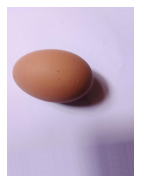

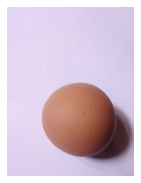

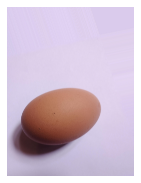

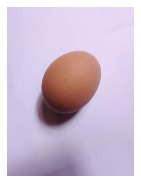

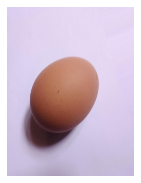

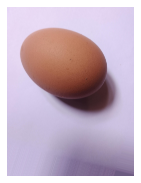

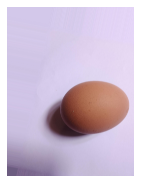

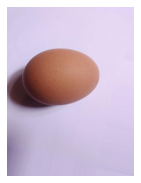

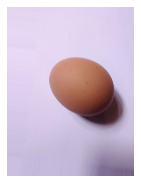

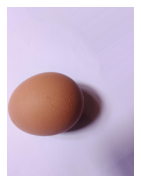

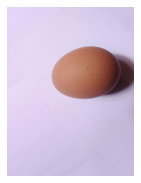

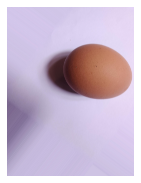

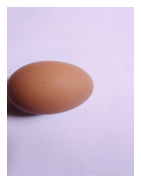

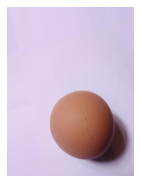

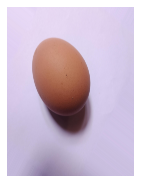

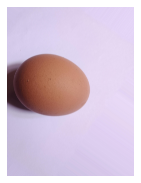

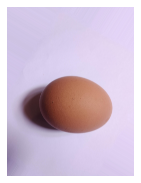

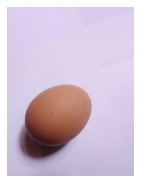

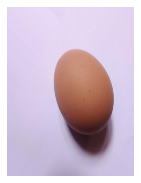

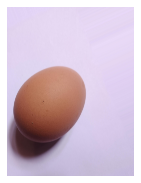

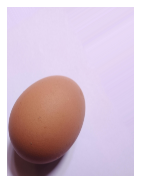

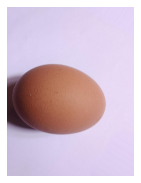

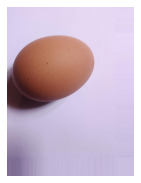

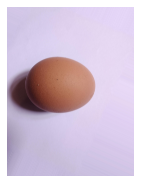

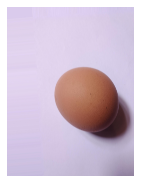

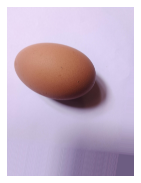

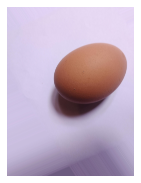

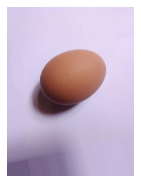

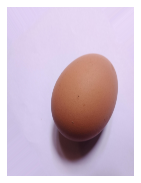

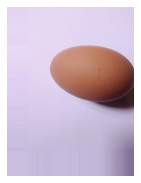

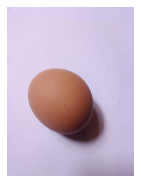

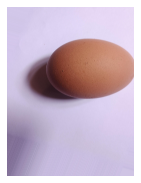

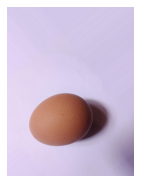

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

file_name_generator = []
tag_generator = []
full_path_generator = []

loadData(save_path, file_name_generator, tag_generator, full_path_generator)
df_generator = pd.DataFrame({"Path":full_path_generator,'Nama File':file_name_generator})

for gmb_hsl_generator in range (0, len(full_path_generator)):
  gambar_uji = Image.open(full_path_generator[gmb_hsl_generator])
  fig = plt.figure(figsize=(5,15))
  ax  = fig.add_subplot(1,2,1)
  ax.axis("off")
  ax.imshow(gambar_uji)
  plt.show()

In [13]:
# train, testing, validation
def datasetGenerator(datagen, data, gambar_size, batch_s, mode, shufle):
  generator = datagen.flow_from_directory(data,
                                          target_size= gambar_size,
                                          batch_size=batch_s,
                                          class_mode=mode,
                                          shuffle=shufle)
  return(generator)

# datagen => function "imageGenerator"
# data => patch dataset (trainData, testData dan validData)
# gambar_size => ukuran matriks piksel gambar ex: "(125,125)"
# batch_s => nilai besarnya batch yang dipakai
# mode => 2 option 'categorial' dan 'binary'
# shufle => berisi boolean untuk aktif atau tidaknya

In [14]:
# Membuat tf.data untuk kompabilitas yang lebih baik untuk tensorflow 2.1 (tf.keras)
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [15]:
trainData = '/content/drive/MyDrive/Colab Notebooks/dataset/train/'
validData = '/content/drive/MyDrive/Colab Notebooks/dataset/validation/'
testData = '/content/drive/MyDrive/Colab Notebooks/dataset/test/'

In [16]:
gambar_size1 = (256, 256)
gambar_size2 = (128, 128)
gambar_size3 = (64, 64)

batch_size = 16
shufle = True

# mode binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
# mode categorical = 1,2,3,4,5
mode = 'categorical'


## Dataset Generator Ukuran Gambar (256, 256)

In [17]:
train_generator_256 = datasetGenerator(datagen, trainData, gambar_size1, batch_size, mode, shufle)
val_generator_256 = datasetGenerator(datagen, validData, gambar_size1, batch_size, mode, shufle)
test_generator_256 = datasetGenerator(datagen, testData, gambar_size1, batch_size, mode, shufle)

Found 257 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [18]:
labels_256 = train_generator_256.class_indices.keys()
print(labels_256)

num_class_256 = test_generator_256.num_classes

dict_keys(['C', 'CM', 'CT'])


In [19]:
input_shape_256 = input(gambar_size1)

In [20]:
train_data_256 = tf_data_generator(train_generator_256, input_shape_256)
test_data_256 = tf_data_generator(test_generator_256, input_shape_256)
val_data_256 = tf_data_generator(val_generator_256, input_shape_256)

## Dataset Generator Ukuran Gambar (128,128)

In [21]:
train_generator_128 = datasetGenerator(datagen, trainData, gambar_size2, batch_size, mode, shufle)
val_generator_128 = datasetGenerator(datagen, validData, gambar_size2, batch_size, mode, shufle)
test_generator_128 = datasetGenerator(datagen, testData, gambar_size2, batch_size, mode, shufle)

Found 257 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [22]:
labels_128 = train_generator_128.class_indices.keys()
print(labels_128)

num_class_128 = test_generator_128.num_classes

dict_keys(['C', 'CM', 'CT'])


In [23]:
input_shape_128 = input(gambar_size2)

In [24]:
train_data_128 = tf_data_generator(train_generator_128, input_shape_128)
test_data_128 = tf_data_generator(test_generator_128, input_shape_128)
val_data_128 = tf_data_generator(val_generator_128, input_shape_128)

## Dataset Generator Ukuran Gambar (64, 64)

In [25]:
train_generator_64 = datasetGenerator(datagen, trainData, gambar_size3, batch_size, mode, shufle)
val_generator_64 = datasetGenerator(datagen, validData, gambar_size3, batch_size, mode, shufle)
test_generator_64 = datasetGenerator(datagen, testData, gambar_size3, batch_size, mode, shufle)

Found 257 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [26]:
labels_64 = train_generator_64.class_indices.keys()
print(labels_64)

num_class_64 = test_generator_64.num_classes

dict_keys(['C', 'CM', 'CT'])


In [27]:
input_shape_64 = input(gambar_size3)

In [28]:
train_data_64 = tf_data_generator(train_generator_64, input_shape_64)
test_data_64 = tf_data_generator(test_generator_64, input_shape_64)
val_data_64 = tf_data_generator(val_generator_64, input_shape_64)

# Membuat Struktur CNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import time

In [30]:
def strukturCNN(input_shape, num_class):
  model = Sequential()
  #Langkah 1 convolution
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Langkah 2 Pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_class))
  model.add(Activation('softmax'))

  # Menjalankan model
  print('============ Compiling Model', input_shape, '============')
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return(model)

In [31]:
 # lihat model yang telah dibangun
def model_diagram(model, path_model, nm_model):
  model_d = tf.keras.utils.plot_model(model,
                            to_file = os.path.join(path_model, nm_model),
                            show_shapes=True,
                            show_layer_names=True,
                            rankdir='TB',
                            expand_nested=True,
                            dpi=55)
  return(model_d)
 

In [32]:
path_model = "/content/drive/MyDrive/Colab Notebooks/model/"

============ Compiling Model (256, 256, 3) ============


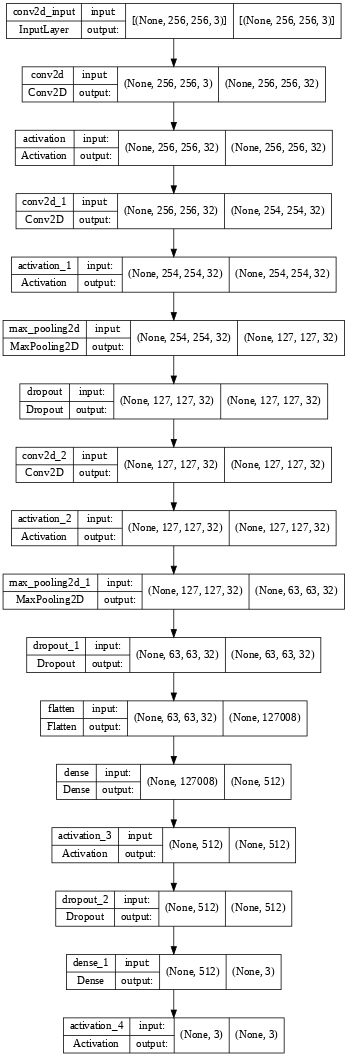

In [33]:
model_256 = strukturCNN(input_shape_256, num_class_256)
model_diagram(model_256, path_model, 'model_256.png')

============ Compiling Model (128, 128, 3) ============


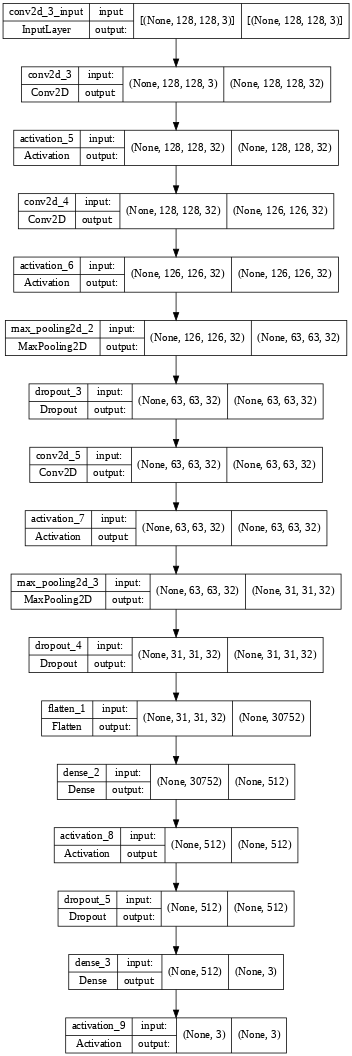

In [34]:
model_128 = strukturCNN(input_shape_128, num_class_128)
model_diagram(model_128, path_model, 'model_128.png')

============ Compiling Model (64, 64, 3) ============


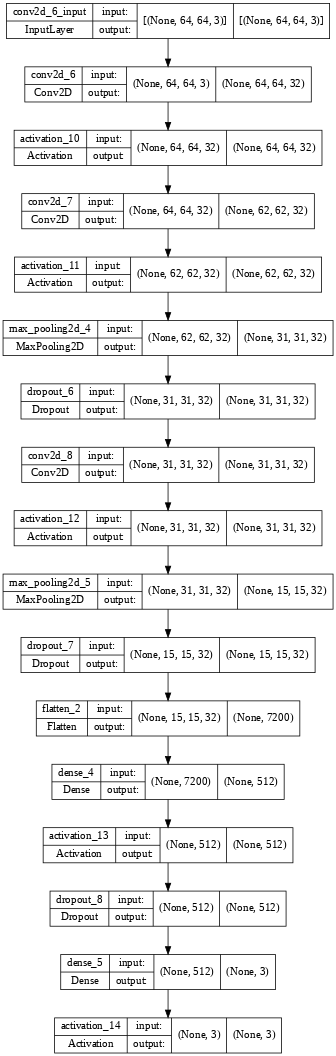

In [35]:
model_64 = strukturCNN(input_shape_64, num_class_64)
model_diagram(model_64, path_model, 'model_64.png')

# Train Model CNN

## Persiapan Model CNN

In [36]:
from matplotlib import pyplot as plt

In [37]:
# training model cnn
def modelTrain(model, train_data, train_generator, n_epoch, val_data, val_generator, shufle, n_verbose):
    history = model.fit(x=train_data,
          steps_per_epoch=len(train_generator),
          epochs=n_epoch,
          validation_data=val_data,
          validation_steps=len(val_generator), 
          shuffle=shufle,
          verbose = n_verbose)
    return(history)

In [38]:
def simpan_model(path_model, nama_file_model, model):
  simpan_model_path = os.path.join(path_model, nama_file_model)

  if os.path.exists(os.path.join(path_model)) == False:
      os.makedirs(os.path.join(path_model))
    
  print('Saving Model di {}...'.format(simpan_model_path))
  model.save(simpan_model_path,include_optimizer=False) 

## Plot MSE dan MAE

In [39]:
# Plot MAE
def mae(hasil_training, judul_plot_mae, path_mae, nm_mae):
  fig = plt.figure()
  plt.plot(hasil_training.history['loss'], label='Training Loss')
  plt.plot(hasil_training.history['val_loss'], label='Validation Loss')
  plt.title(judul_plot_mae)
  plt.ylabel('value')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper left")
  plt.show()
  fig.savefig(os.path.join(path_mae, nm_mae))

# nm_plot = diisi string untuk judul plot

In [40]:
def mse(hasil_training, judul_plot_mse, path_mse, nm_mse):
  fig = plt.figure()
  plt.plot(hasil_training.history['accuracy'], label='Training Accuracy')
  plt.plot(hasil_training.history['val_accuracy'], label='Validation Accuracy')
  plt.title(judul_plot_mse)
  plt.ylabel('value')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper left")
  plt.show()
  fig.savefig(os.path.join(path_mse, nm_mse))

  # nm_plot = diisi string untuk judul plot

In [41]:
epoch1 = 50
epoch2 = 75
epoch3 = 100

## Training Epoch 100

### ukuran gambar 256

In [ ]:
start = time.time()
training_epoch100_256 = modelTrain(model_256,
                                  train_data_256,
                                  train_generator_256,
                                  epoch3,
                                  val_data_256,
                                  val_generator_256,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/100
17/17 [==============================] - 142s 8s/step - loss: 3.2081 - accuracy: 0.4553 - val_loss: 0.8378 - val_accuracy: 0.6875
Epoch 2/100
17/17 [==============================] - 100s 6s/step - loss: 0.5048 - accuracy: 0.7977 - val_loss: 0.7367 - val_accuracy: 0.6458
Epoch 3/100
17/17 [==============================] - 97s 6s/step - loss: 0.3786 - accuracy: 0.8599 - val_loss: 0.6728 - val_accuracy: 0.7500
Epoch 4/100
17/17 [==============================] - 99s 6s/step - loss: 0.2441 - accuracy: 0.8988 - val_loss: 0.3902 - val_accuracy: 0.8958
Epoch 5/100
17/17 [==============================] - 97s 6s/step - loss: 0.1960 - accuracy: 0.9222 - val_loss: 0.3643 - val_accuracy: 0.9167
Epoch 6/100
17/17 [==============================] - 99s 6s/step - loss: 0.4384 - accuracy: 0.8599 - val_loss: 1.0196 - val_accuracy: 0.6250
Epoch 7/100
17/17 [==============================] - 99s 6s/step - loss: 0.3320 - accuracy: 0.9027 - val_loss: 0.3120 - val_accuracy: 0.9583
Epoch 8/100

In [ ]:
simpan_model(path_model, 'model100_256_.h5', model_256)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model100_256_.h5...


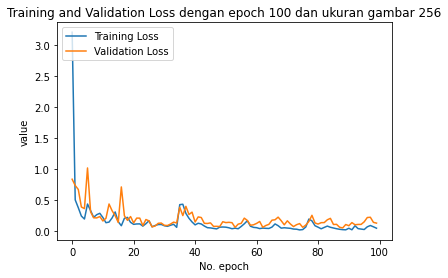

In [ ]:
# Plot hasil epoch100: MAE
plot_mae100_256 = 'Training and Validation Loss dengan epoch 100 dan ukuran gambar 256'
mae(training_epoch100_256, plot_mae100_256, path_model, 'MAE256_epoch100.png')

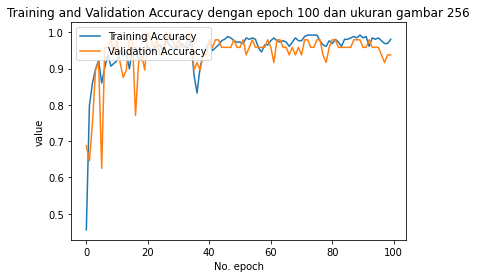

In [ ]:
# Plot hasil epoch100: MSE
plot_mse100_256 = 'Training and Validation Accuracy dengan epoch 100 dan ukuran gambar 256'
mse(training_epoch100_256, plot_mse100_256, path_model, 'MSE256_epoch100.png')

### ukuran gambar 128

In [ ]:
start = time.time()
training_epoch100_128 = modelTrain(model_128,
                                  train_data_128,
                                  train_generator_128,
                                  epoch3,
                                  val_data_128,
                                  val_generator_128,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/100
17/17 [==============================] - 56s 3s/step - loss: 2.1007 - accuracy: 0.3813 - val_loss: 1.0853 - val_accuracy: 0.3750
Epoch 2/100
17/17 [==============================] - 51s 3s/step - loss: 0.8739 - accuracy: 0.6109 - val_loss: 0.7149 - val_accuracy: 0.8125
Epoch 3/100
17/17 [==============================] - 49s 3s/step - loss: 0.6239 - accuracy: 0.7276 - val_loss: 0.4927 - val_accuracy: 0.8333
Epoch 4/100
17/17 [==============================] - 49s 3s/step - loss: 0.6323 - accuracy: 0.7354 - val_loss: 0.6968 - val_accuracy: 0.7500
Epoch 5/100
17/17 [==============================] - 49s 3s/step - loss: 0.5217 - accuracy: 0.7899 - val_loss: 0.6203 - val_accuracy: 0.7292
Epoch 6/100
17/17 [==============================] - 50s 3s/step - loss: 0.4085 - accuracy: 0.8405 - val_loss: 0.4595 - val_accuracy: 0.7708
Epoch 7/100
17/17 [==============================] - 49s 3s/step - loss: 0.4218 - accuracy: 0.8444 - val_loss: 0.4695 - val_accuracy: 0.8333
Epoch 8/100
1

In [ ]:
simpan_model(path_model, 'model100_128_.h5', model_128)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model100_128_.h5...


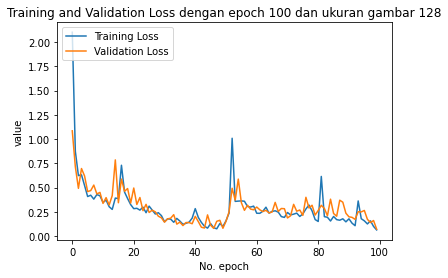

In [ ]:
# Plot hasil epoch100: MAE
plot_mae100_128 = 'Training and Validation Loss dengan epoch 100 dan ukuran gambar 128'
mae(training_epoch100_128, plot_mae100_128, path_model, 'MAE128_epoch100.png')

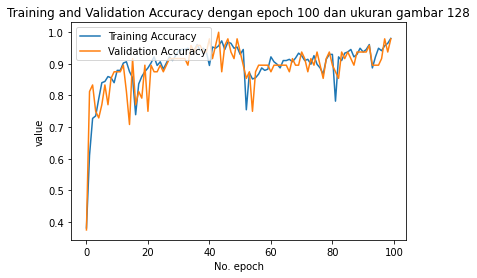

In [ ]:
# Plot hasil epoch100: MSE
plot_mse100_128 = 'Training and Validation Accuracy dengan epoch 100 dan ukuran gambar 128'
mse(training_epoch100_128, plot_mse100_128, path_model, 'MSE128_epoch100.png')

### ukuran gambar 64

In [ ]:
start = time.time()
training_epoch100_64 = modelTrain(model_64,
                                 train_data_64,
                                 train_generator_64,
                                 epoch3,
                                 val_data_64,
                                 val_generator_64,
                                 shufle,
                                 1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/100
17/17 [==============================] - 39s 2s/step - loss: 1.1828 - accuracy: 0.3580 - val_loss: 1.0166 - val_accuracy: 0.5208
Epoch 2/100
17/17 [==============================] - 38s 2s/step - loss: 0.7284 - accuracy: 0.6965 - val_loss: 0.5329 - val_accuracy: 0.7917
Epoch 3/100
17/17 [==============================] - 38s 2s/step - loss: 0.4599 - accuracy: 0.8132 - val_loss: 0.4073 - val_accuracy: 0.8750
Epoch 4/100
17/17 [==============================] - 38s 2s/step - loss: 0.3730 - accuracy: 0.8638 - val_loss: 1.1291 - val_accuracy: 0.6458
Epoch 5/100
17/17 [==============================] - 38s 2s/step - loss: 0.5851 - accuracy: 0.7549 - val_loss: 0.7118 - val_accuracy: 0.6042
Epoch 6/100
17/17 [==============================] - 39s 2s/step - loss: 0.5794 - accuracy: 0.7860 - val_loss: 0.4092 - val_accuracy: 0.8542
Epoch 7/100
17/17 [==============================] - 38s 2s/step - loss: 0.3559 - accuracy: 0.8716 - val_loss: 0.4842 - val_accuracy: 0.7917
Epoch 8/100
1

In [ ]:
simpan_model(path_model, 'model100_64_.h5', model_64)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model100_64_.h5...


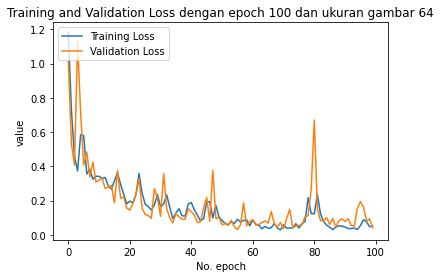

In [ ]:
# Plot hasil epoch100: MAE
plot_mae100_64 = 'Training and Validation Loss dengan epoch 100 dan ukuran gambar 64'
mae(training_epoch100_64, plot_mae100_64, path_model, 'MAE64_epoch100.png')

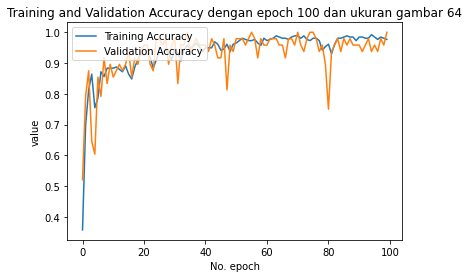

In [ ]:
# Plot hasil epoch100: MSE
plot_mse100_64 = 'Training and Validation Accuracy dengan epoch 100 dan ukuran gambar 64'
mse(training_epoch100_64, plot_mse100_64, path_model, 'MSE64_epoch100.png')

## Training Epoch 75

### ukuran gambar 256

In [ ]:
start = time.time()
training_epoch75_256 = modelTrain(model_256,
                                  train_data_256,
                                  train_generator_256,
                                  epoch2,
                                  val_data_256,
                                  val_generator_256,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/75
17/17 [==============================] - 159s 9s/step - loss: 5.6380 - accuracy: 0.4280 - val_loss: 0.9971 - val_accuracy: 0.3333
Epoch 2/75
17/17 [==============================] - 109s 6s/step - loss: 0.9182 - accuracy: 0.5564 - val_loss: 0.8293 - val_accuracy: 0.6458
Epoch 3/75
17/17 [==============================] - 115s 7s/step - loss: 0.7025 - accuracy: 0.6770 - val_loss: 0.8950 - val_accuracy: 0.4792
Epoch 4/75
17/17 [==============================] - 110s 6s/step - loss: 0.6321 - accuracy: 0.7237 - val_loss: 0.7846 - val_accuracy: 0.6667
Epoch 5/75
17/17 [==============================] - 108s 6s/step - loss: 0.5192 - accuracy: 0.7315 - val_loss: 0.9160 - val_accuracy: 0.5625
Epoch 6/75
17/17 [==============================] - 110s 7s/step - loss: 0.4211 - accuracy: 0.8327 - val_loss: 0.6112 - val_accuracy: 0.7708
Epoch 7/75
17/17 [==============================] - 107s 6s/step - loss: 0.3265 - accuracy: 0.8638 - val_loss: 0.5557 - val_accuracy: 0.8333
Epoch 8/75
17

In [ ]:
simpan_model(path_model, 'model75_256.h5', model_256)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model75_256.h5...


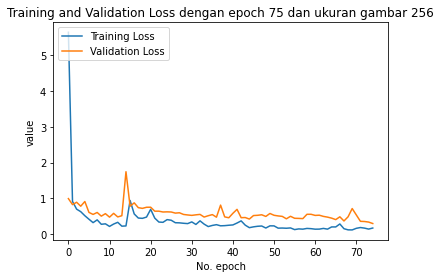

In [ ]:
# Plot hasil epoch75: MAE
plot_mae75_256 = 'Training and Validation Loss dengan epoch 75 dan ukuran gambar 256'
mae(training_epoch75_256, plot_mae75_256, path_model, 'MAE256_epoch75.png')

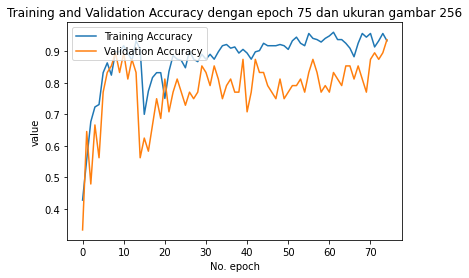

In [ ]:
# Plot hasil epoch75: MSE
plot_mse75_256 = 'Training and Validation Accuracy dengan epoch 75 dan ukuran gambar 256'
mse(training_epoch75_256, plot_mse75_256, path_model, 'MSE256_epoch75.png')

### ukuran gambar 128

In [ ]:
start = time.time()
training_epoch75_128 = modelTrain(model_128,
                                  train_data_128,
                                  train_generator_128,
                                  epoch2,
                                  val_data_128,
                                  val_generator_128,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/75
17/17 [==============================] - 58s 3s/step - loss: 1.1124 - accuracy: 0.5292 - val_loss: 0.8115 - val_accuracy: 0.5833
Epoch 2/75
17/17 [==============================] - 51s 3s/step - loss: 0.7563 - accuracy: 0.6381 - val_loss: 0.9291 - val_accuracy: 0.6042
Epoch 3/75
17/17 [==============================] - 51s 3s/step - loss: 0.6284 - accuracy: 0.7121 - val_loss: 0.6808 - val_accuracy: 0.6875
Epoch 4/75
17/17 [==============================] - 52s 3s/step - loss: 0.4330 - accuracy: 0.8171 - val_loss: 0.6737 - val_accuracy: 0.6875
Epoch 5/75
17/17 [==============================] - 51s 3s/step - loss: 0.6274 - accuracy: 0.7549 - val_loss: 0.6384 - val_accuracy: 0.8125
Epoch 6/75
17/17 [==============================] - 51s 3s/step - loss: 0.3753 - accuracy: 0.8638 - val_loss: 0.4767 - val_accuracy: 0.8125
Epoch 7/75
17/17 [==============================] - 52s 3s/step - loss: 0.3815 - accuracy: 0.8638 - val_loss: 0.4036 - val_accuracy: 0.8958
Epoch 8/75
17/17 [==

In [ ]:
simpan_model(path_model, 'model75_128.h5', model_128)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model75_128.h5...


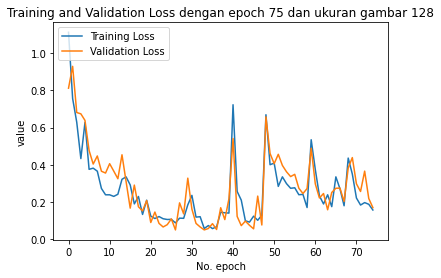

In [ ]:
# Plot hasil epoch75: MAE
plot_mae75_128 = 'Training and Validation Loss dengan epoch 75 dan ukuran gambar 128'
mae(training_epoch75_128, plot_mae75_128, path_model, 'MAE128_epoch75.png')

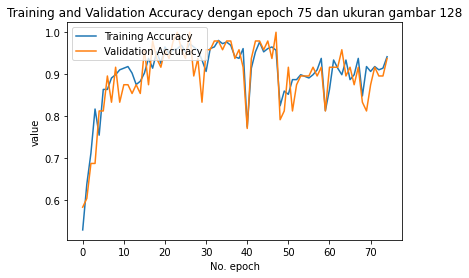

In [ ]:
# Plot hasil epoch75: MSE
plot_mse75_128 = 'Training and Validation Accuracy dengan epoch 75 dan ukuran gambar 128'
mse(training_epoch75_128, plot_mse75_128, path_model, 'MSE128_epoch75.png')

### ukuran gambar 64

In [ ]:
start = time.time()
training_epoch75_64 = modelTrain(model_64,
                                 train_data_64,
                                 train_generator_64,
                                 epoch2,
                                 val_data_64,
                                 val_generator_64,
                                 shufle,
                                 1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/75
17/17 [==============================] - 75s 4s/step - loss: 1.3753 - accuracy: 0.3619 - val_loss: 1.0589 - val_accuracy: 0.3333
Epoch 2/75
17/17 [==============================] - 39s 2s/step - loss: 0.8577 - accuracy: 0.6381 - val_loss: 0.6150 - val_accuracy: 0.6458
Epoch 3/75
17/17 [==============================] - 38s 2s/step - loss: 0.5380 - accuracy: 0.7626 - val_loss: 0.6169 - val_accuracy: 0.7292
Epoch 4/75
17/17 [==============================] - 38s 2s/step - loss: 0.5166 - accuracy: 0.8210 - val_loss: 0.5410 - val_accuracy: 0.7500
Epoch 5/75
17/17 [==============================] - 38s 2s/step - loss: 0.3787 - accuracy: 0.8405 - val_loss: 0.5750 - val_accuracy: 0.6875
Epoch 6/75
17/17 [==============================] - 38s 2s/step - loss: 0.3925 - accuracy: 0.8521 - val_loss: 0.4324 - val_accuracy: 0.7917
Epoch 7/75
17/17 [==============================] - 39s 2s/step - loss: 0.3454 - accuracy: 0.8755 - val_loss: 0.3842 - val_accuracy: 0.8333
Epoch 8/75
17/17 [==

In [ ]:
simpan_model(path_model, 'model75_64.h5', model_64)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model75_64.h5...


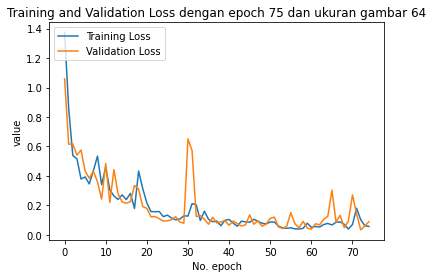

In [ ]:
# Plot hasil epoch75: MAE
plot_mae75_64 = 'Training and Validation Loss dengan epoch 75 dan ukuran gambar 64'
mae(training_epoch75_64, plot_mae75_64, path_model, 'MAE64_epoch75.png')

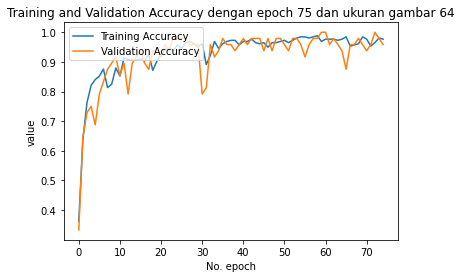

In [ ]:
# Plot hasil epoch75: MSE
plot_mse75_64 = 'Training and Validation Accuracy dengan epoch 75 dan ukuran gambar 64'
mse(training_epoch75_64, plot_mse75_64, path_model, 'MSE64_epoch75.png')

## Training Epoch 50

### ukuran gambar 256

In [ ]:
start = time.time()
training_epoch50_256 = modelTrain(model_256,
                                  train_data_256,
                                  train_generator_256,
                                  epoch1,
                                  val_data_256,
                                  val_generator_256,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/50
17/17 [==============================] - 101s 6s/step - loss: 4.6147 - accuracy: 0.4436 - val_loss: 0.7961 - val_accuracy: 0.6042
Epoch 2/50
17/17 [==============================] - 98s 6s/step - loss: 0.5906 - accuracy: 0.7665 - val_loss: 0.4772 - val_accuracy: 0.8542
Epoch 3/50
17/17 [==============================] - 101s 6s/step - loss: 0.4729 - accuracy: 0.8054 - val_loss: 0.5055 - val_accuracy: 0.8542
Epoch 4/50
17/17 [==============================] - 98s 6s/step - loss: 0.5064 - accuracy: 0.8444 - val_loss: 0.3367 - val_accuracy: 0.8750
Epoch 5/50
17/17 [==============================] - 100s 6s/step - loss: 0.5683 - accuracy: 0.8093 - val_loss: 0.4768 - val_accuracy: 0.8958
Epoch 6/50
17/17 [==============================] - 97s 6s/step - loss: 0.4096 - accuracy: 0.8560 - val_loss: 0.5509 - val_accuracy: 0.7708
Epoch 7/50
17/17 [==============================] - 99s 6s/step - loss: 0.5617 - accuracy: 0.7860 - val_loss: 0.5983 - val_accuracy: 0.8125
Epoch 8/50
17/17 

In [ ]:
simpan_model(path_model, 'model50_256.h5', model_256)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model50_256.h5...


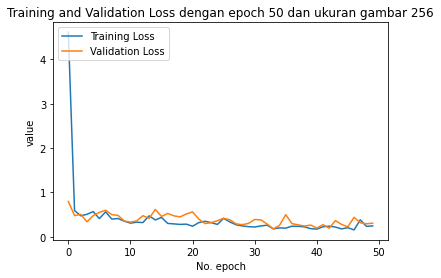

In [ ]:
# Plot hasil epoch50: MAE
plot_mae50_256 = 'Training and Validation Loss dengan epoch 50 dan ukuran gambar 256'
mae(training_epoch50_256, plot_mae50_256, path_model, 'MAE256_epoch50.png')

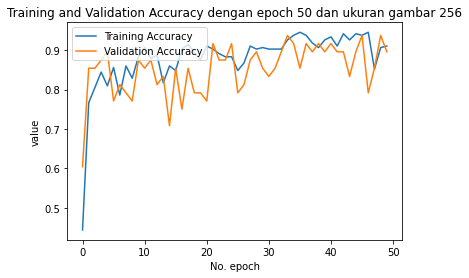

In [ ]:
# Plot hasil epoch50: MSE
plot_mse50_256 = 'Training and Validation Accuracy dengan epoch 50 dan ukuran gambar 256'
mse(training_epoch50_256, plot_mse50_256, path_model, 'MSE256_epoch50.png')

### ukuran gambar 128

In [ ]:
start = time.time()
training_epoch50_128 = modelTrain(model_128,
                                  train_data_128,
                                  train_generator_128,
                                  epoch1, val_data_128,
                                  val_generator_128,
                                  shufle,
                                  1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/50
17/17 [==============================] - 55s 3s/step - loss: 2.1446 - accuracy: 0.4436 - val_loss: 1.0078 - val_accuracy: 0.6250
Epoch 2/50
17/17 [==============================] - 49s 3s/step - loss: 0.7067 - accuracy: 0.7082 - val_loss: 0.6932 - val_accuracy: 0.7083
Epoch 3/50
17/17 [==============================] - 51s 3s/step - loss: 0.4729 - accuracy: 0.8171 - val_loss: 0.5117 - val_accuracy: 0.7917
Epoch 4/50
17/17 [==============================] - 49s 3s/step - loss: 0.4895 - accuracy: 0.8210 - val_loss: 0.5957 - val_accuracy: 0.8333
Epoch 5/50
17/17 [==============================] - 49s 3s/step - loss: 0.4157 - accuracy: 0.8444 - val_loss: 0.6512 - val_accuracy: 0.7083
Epoch 6/50
17/17 [==============================] - 50s 3s/step - loss: 0.6062 - accuracy: 0.7626 - val_loss: 0.7334 - val_accuracy: 0.6875
Epoch 7/50
17/17 [==============================] - 49s 3s/step - loss: 0.3912 - accuracy: 0.8444 - val_loss: 0.3076 - val_accuracy: 0.8958
Epoch 8/50
17/17 [==

In [ ]:
simpan_model(path_model, 'model50_128.h5', model_128)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model50_128.h5...


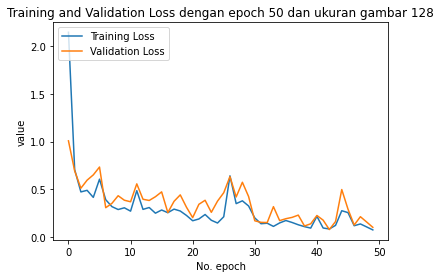

In [ ]:
# Plot hasil epoch50: MAE
plot_mae50_128 = 'Training and Validation Loss dengan epoch 50 dan ukuran gambar 128'
mae(training_epoch50_128, plot_mae50_128, path_model, 'MAE128_epoch50.png')

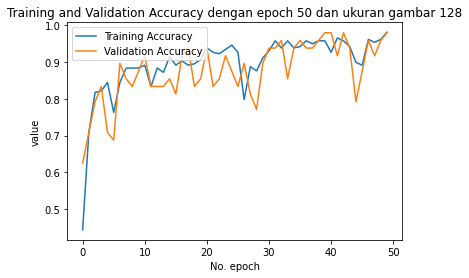

In [ ]:
# Plot hasil epoch50: MSE
plot_mse50_128 = 'Training and Validation Accuracy dengan epoch 50 dan ukuran gambar 128'
mse(training_epoch50_128, plot_mse50_128, path_model, 'MSE128_epoch50.png')

### ukuran gambar 64

In [ ]:
start = time.time()
training_epoch50_64 = modelTrain(model_64,
                                 train_data_64,
                                 train_generator_64,
                                 epoch1,
                                 val_data_64,
                                 val_generator_64,
                                 shufle,
                                 1)
end = time.time()
print("Waktu yang dibutuhkan: {:5.4f} Menit".format((end-start)/60.0))

Epoch 1/50
17/17 [==============================] - 91s 5s/step - loss: 1.1157 - accuracy: 0.4163 - val_loss: 0.9924 - val_accuracy: 0.5833
Epoch 2/50
17/17 [==============================] - 40s 2s/step - loss: 0.8868 - accuracy: 0.5447 - val_loss: 0.7734 - val_accuracy: 0.6458
Epoch 3/50
17/17 [==============================] - 39s 2s/step - loss: 0.6784 - accuracy: 0.7004 - val_loss: 0.6183 - val_accuracy: 0.7708
Epoch 4/50
17/17 [==============================] - 38s 2s/step - loss: 0.5903 - accuracy: 0.6809 - val_loss: 0.6280 - val_accuracy: 0.6458
Epoch 5/50
17/17 [==============================] - 38s 2s/step - loss: 0.5842 - accuracy: 0.7354 - val_loss: 0.6222 - val_accuracy: 0.6250
Epoch 6/50
17/17 [==============================] - 40s 2s/step - loss: 0.4864 - accuracy: 0.7626 - val_loss: 0.5156 - val_accuracy: 0.8125
Epoch 7/50
17/17 [==============================] - 38s 2s/step - loss: 0.5028 - accuracy: 0.7899 - val_loss: 0.5591 - val_accuracy: 0.6875
Epoch 8/50
17/17 [==

In [ ]:
simpan_model(path_model, 'model50_64.h5', model_64)

Saving Model di /content/drive/MyDrive/Colab Notebooks/model/model50_64.h5...


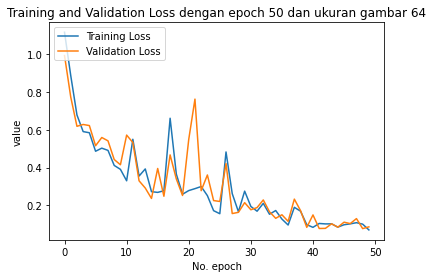

In [ ]:
# Plot hasil epoch50: MAE
plot_mae50_64 = 'Training and Validation Loss dengan epoch 50 dan ukuran gambar 64'
mae(training_epoch50_64, plot_mae50_64, path_model, 'MAE64_epoch50.png')

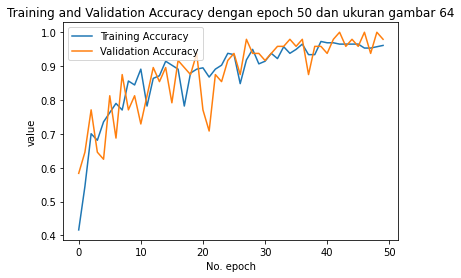

In [ ]:
# Plot hasil epoch50: MSE
plot_mse50_64 = 'Training and Validation Accuracy dengan epoch 50 dan ukuran gambar 64'
mse(training_epoch50_64, plot_mse50_64, path_model, 'MSE64_epoch50.png')

# Uji Model

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
# path_uji = '/content/drive/MyDrive/Colab Notebooks/dataset/test'
path_uji = '/content/drive/MyDrive/Colab Notebooks/coba'

label = ['C', 'CM', 'CT']

## Load Model

In [ ]:
def preprocess(img,ukuran_image):
    nimg = img.convert('RGB').resize(ukuran_image, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
def modelTesting(model_path):
  model_test = load_model(model_path,compile=False)
  return(model_test)

## Uji Model Fiting Menggunakan Cofusion Matriks

In [ ]:
def uji(path_file_uji,gambar_size,model_uji,prediksi,tag_file_uji, hasil_prediksi,pred_bnr,nilai):
  for gmb_test in range (0, len(path_file_uji)):
    gambar_uji = Image.open(path_file_uji[gmb_test])
    h = preprocess(gambar_uji,gambar_size)
    X = reshape([h])
    y = model_uji.predict(X)
    # print( label[np.argmax(y)], np.max(y) )
    prediksi.append(label[np.argmax(y)])
    if(label[np.argmax(y)] == tag_file_uji[gmb_test]):
      hasil_prediksi.append('BENAR')
      pred_bnr+=1
      nilai.append(np.max(y))
    else:
      hasil_prediksi.append('SALAH')
      nilai.append(np.max(y))

  # menghitung akurasi menggunakan confusion matrix
  cm_akurasi = pred_bnr/len(tag_file_uji)*100
  print(int(cm_akurasi),'%')

### Uji Model Epoch 100

#### ukuran gambar 256

In [ ]:
model_100_256 = '/content/drive/MyDrive/Colab Notebooks/model/model100_256.h5'
nama_file100_256 = []
tag_file_uji100_256 = []
path_file_uji100_256 = []
prediksi100_256 = []
hasil_prediksi100_256 = []
nilai100_256 = []
pred_bnr100_256 = 0

loadData(path_uji,
         nama_file100_256,
         tag_file_uji100_256,
         path_file_uji100_256)

model_uji = modelTesting(model_100_256)

uji(path_file_uji100_256,
    gambar_size1,
    model_uji,
    prediksi100_256,
    tag_file_uji100_256,
    hasil_prediksi100_256,
    pred_bnr100_256,
    nilai100_256)

hasil_pred = pd.DataFrame({'Prediksi Sistem':prediksi100_256,
                           "Data Asal":tag_file_uji100_256,
                           "Hasil Prediksi":hasil_prediksi100_256,
                           "prediksi":nilai100_256,
                           'File':nama_file100_256})

hasil_pred.head(len(path_file_uji100_256))

66 %


,Prediksi Sistem,Data Asal,Hasil Prediksi,prediksi,File
0,C,C,BENAR,0.945709,1.jpg
1,C,C,BENAR,0.990007,3.jpg
2,C,C,BENAR,0.997704,4.jpg
3,CM,C,SALAH,0.701022,5.jpg
4,CT,C,SALAH,0.999974,10.jpg
5,CT,C,SALAH,0.999967,11.jpg
6,C,C,BENAR,0.992216,6.jpg
7,CT,CT,BENAR,0.999977,9.jpg
8,CM,CT,SALAH,0.995194,2.jpg
9,CT,CT,BENAR,0.945134,7.jpg


#### ukuran gambar 128

In [ ]:
model_100_128 = '/content/drive/MyDrive/Colab Notebooks/model/model100_128.h5'
nama_file100_128 = []
tag_file_uji100_128 = []
path_file_uji100_128 = []
prediksi100_128 = []
hasil_prediksi100_128 = []
nilai100_128 = []
pred_bnr100_128 = 0

loadData(path_uji,
         nama_file100_128,
         tag_file_uji100_128,
         path_file_uji100_128)

model_uji = modelTesting(model_100_128)

uji(path_file_uji100_128,
    gambar_size2,
    model_uji,
    prediksi100_128,
    tag_file_uji100_128,
    hasil_prediksi100_128,
    pred_bnr100_128,
    nilai100_128)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji100_128,
                           'Prediksi Sistem':prediksi100_128,
                           "Hasil Prediksi":hasil_prediksi100_128,
                           "prediksi":nilai100_128})

hasil_pred.head(len(path_file_uji100_128))

75 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.960424
1,C,C,BENAR,0.997740
2,C,C,BENAR,0.998883
3,C,C,BENAR,0.562604
4,C,CT,SALAH,0.999657
5,C,CT,SALAH,0.999833
6,C,C,BENAR,0.995274
7,CT,CT,BENAR,0.999681
8,CT,CM,SALAH,0.613331
9,CT,CT,BENAR,0.812897


#### ukuran gambar 64

In [ ]:
model_100_64 = '/content/drive/MyDrive/Colab Notebooks/model/model100_64.h5'
nama_file100_64 = []
tag_file_uji100_64 = []
path_file_uji100_64 = []
prediksi100_64 = []
hasil_prediksi100_64 = []
nilai100_64 = []
pred_bnr100_64 = 0

loadData(path_uji,
         nama_file100_64,
         tag_file_uji100_64,
         path_file_uji100_64)

model_uji = modelTesting(model_100_64)

uji(path_file_uji100_64,
    gambar_size3,
    model_uji,
    prediksi100_64,
    tag_file_uji100_64,
    hasil_prediksi100_64,
    pred_bnr100_64,
    nilai100_64)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji100_64,
                           'Prediksi Sistem':prediksi100_64,
                           "Hasil Prediksi":hasil_prediksi100_64,
                           "prediksi":nilai100_64})

hasil_pred.head(len(path_file_uji100_64))

66 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.955195
1,C,C,BENAR,0.991410
2,C,C,BENAR,0.998499
3,C,CM,SALAH,0.989293
4,C,CT,SALAH,0.999974
5,C,CT,SALAH,0.999998
6,C,C,BENAR,0.991035
7,CT,CT,BENAR,0.999852
8,CT,CM,SALAH,0.991678
9,CT,CT,BENAR,0.979650


### Uji Model Epoch 75

#### ukuran gambar 256

In [ ]:
model_75_256 = '/content/drive/MyDrive/Colab Notebooks/model/model75_256.h5'
nama_file75_256 = []
tag_file_uji75_256 = []
path_file_uji75_256 = []
prediksi75_256 = []
hasil_prediksi75_256 = []
nilai75_256 = []
pred_bnr75_256 = 0

loadData(path_uji,
         nama_file75_256,
         tag_file_uji75_256,
         path_file_uji75_256)

model_uji = modelTesting(model_75_256)

uji(path_file_uji75_256,
    gambar_size1,
    model_uji,
    prediksi75_256,
    tag_file_uji75_256,
    hasil_prediksi75_256,
    pred_bnr75_256,
    nilai75_256)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji75_256,
                           'Prediksi Sistem':prediksi75_256,
                           "Hasil Prediksi":hasil_prediksi75_256,
                           "prediksi":nilai75_256})

hasil_pred.head(len(path_file_uji75_256))


66 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.569511
1,C,C,BENAR,0.763898
2,C,C,BENAR,0.846916
3,C,CM,SALAH,0.679929
4,C,CT,SALAH,0.985167
5,C,CT,SALAH,0.996567
6,C,C,BENAR,0.689536
7,CT,CT,BENAR,0.949894
8,CT,CM,SALAH,0.555957
9,CT,CT,BENAR,0.742648


#### ukuran gambar 128

In [ ]:
model_75_128 = '/content/drive/MyDrive/Colab Notebooks/model/model75_128.h5'
nama_file75_128 = []
tag_file_uji75_128 = []
path_file_uji75_128 = []
prediksi75_128 = []
hasil_prediksi75_128 = []
nilai75_128 = []
pred_bnr75_128 = 0

loadData(path_uji,
         nama_file75_128,
         tag_file_uji75_128,
         path_file_uji75_128)

model_uji = modelTesting(model_75_128)

uji(path_file_uji75_128,
    gambar_size2,
    model_uji,
    prediksi75_128,
    tag_file_uji75_128,
    hasil_prediksi75_128,
    pred_bnr75_128,
    nilai75_128)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji75_128,
                           'Prediksi Sistem':prediksi75_128,
                           "Hasil Prediksi":hasil_prediksi75_128,
                           "prediksi":nilai75_128})

hasil_pred.head(len(path_file_uji75_128))

58 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.821983
1,C,C,BENAR,0.926358
2,C,C,BENAR,0.971945
3,C,CM,SALAH,0.995083
4,C,CT,SALAH,0.937242
5,C,CT,SALAH,0.986174
6,C,C,BENAR,0.752171
7,CT,CT,BENAR,0.989253
8,CT,CM,SALAH,0.996163
9,CT,C,SALAH,0.469734


#### ukuran gambar 64

In [ ]:
model_75_64 = '/content/drive/MyDrive/Colab Notebooks/model/model75_64.h5'
nama_file75_64 = []
tag_file_uji75_64 = []
path_file_uji75_64 = []
prediksi75_64 = []
hasil_prediksi75_64 = []
nilai75_64 = []
pred_bnr75_64 = 0

loadData(path_uji,
         nama_file75_64,
         tag_file_uji75_64,
         path_file_uji75_64)

model_uji = modelTesting(model_75_64)

uji(path_file_uji75_64,
    gambar_size3,
    model_uji,
    prediksi75_64,
    tag_file_uji75_64,
    hasil_prediksi75_64,
    pred_bnr75_64,
    nilai75_64)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji75_64,
                           'Prediksi Sistem':prediksi75_64,
                           "Hasil Prediksi":hasil_prediksi75_64,
                           "prediksi":nilai75_64})

hasil_pred.head(len(path_file_uji75_64))

66 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.651825
1,C,C,BENAR,0.987837
2,C,C,BENAR,0.999596
3,C,CM,SALAH,0.997045
4,C,CT,SALAH,0.999999
5,C,CT,SALAH,0.999999
6,C,C,BENAR,0.984300
7,CT,CT,BENAR,1.000000
8,CT,CM,SALAH,0.998463
9,CT,CT,BENAR,0.980914


### Uji Model Epoch 50

#### ukuran gambar 256

In [ ]:
model_50_256 = '/content/drive/MyDrive/Colab Notebooks/model/model50_256.h5'
nama_file50_256 = []
tag_file_uji50_256 = []
path_file_uji50_256 = []
prediksi50_256 = []
hasil_prediksi50_256 = []
nilai50_256 = []
pred_bnr50_256 = 0

loadData(path_uji,
         nama_file50_256,
         tag_file_uji50_256,
         path_file_uji50_256)

model_uji = modelTesting(model_50_256)

uji(path_file_uji50_256,
    gambar_size1,
    model_uji,
    prediksi50_256,
    tag_file_uji50_256,
    hasil_prediksi50_256,
    pred_bnr50_256,
    nilai50_256)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji50_256,
                           'Prediksi Sistem':prediksi50_256,
                           "Hasil Prediksi":hasil_prediksi50_256,
                           "prediksi":nilai50_256})

hasil_pred.head(len(path_file_uji50_256))

50 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,CT,SALAH,0.900532
1,C,C,BENAR,0.509171
2,C,CT,SALAH,0.569515
3,C,CM,SALAH,0.489825
4,C,CT,SALAH,0.999111
5,C,CT,SALAH,0.998386
6,C,C,BENAR,0.687947
7,CT,CT,BENAR,0.995381
8,CT,CM,SALAH,0.766005
9,CT,CT,BENAR,0.850060


#### ukuran gambar 128

In [ ]:
model_50_128 = '/content/drive/MyDrive/Colab Notebooks/model/model50_128.h5'
nama_file50_128 = []
tag_file_uji50_128 = []
path_file_uji50_128 = []
prediksi50_128 = []
hasil_prediksi50_128 = []
nilai50_128 = []
pred_bnr50_128 = 0

loadData(path_uji,
         nama_file50_128,
         tag_file_uji50_128,
         path_file_uji50_128)

model_uji = modelTesting(model_50_128)

uji(path_file_uji50_128,
    gambar_size2,
    model_uji,
    prediksi50_128,
    tag_file_uji50_128,
    hasil_prediksi50_128,
    pred_bnr50_128,
    nilai50_128)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji50_128,
                           'Prediksi Sistem':prediksi50_128,
                           "Hasil Prediksi":hasil_prediksi50_128,
                           "prediksi":nilai50_128})

hasil_pred.head(len(path_file_uji50_128))

66 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.948262
1,C,C,BENAR,0.993790
2,C,C,BENAR,0.986753
3,C,CM,SALAH,0.817788
4,C,CT,SALAH,0.994107
5,C,CT,SALAH,0.996138
6,C,C,BENAR,0.980826
7,CT,CT,BENAR,0.995983
8,CT,CM,SALAH,0.982348
9,CT,CT,BENAR,0.738053


#### ukuran gambar 64

In [ ]:
model_50_64 = '/content/drive/MyDrive/Colab Notebooks/model/model50_64.h5'
nama_file50_64 = []
tag_file_uji50_64 = []
path_file_uji50_64 = []
prediksi50_64 = []
hasil_prediksi50_64 = []
nilai50_64 = []
pred_bnr50_64 = 0

loadData(path_uji,
         nama_file50_64,
         tag_file_uji50_64,
         path_file_uji50_64)

model_uji = modelTesting(model_50_64)

uji(path_file_uji50_64,
    gambar_size3,
    model_uji,
    prediksi50_64,
    tag_file_uji50_64,
    hasil_prediksi50_64,
    pred_bnr50_64,
    nilai50_64)

hasil_pred = pd.DataFrame({"Data Asal":tag_file_uji50_64,
                           'Prediksi Sistem':prediksi50_64,
                           "Hasil Prediksi":hasil_prediksi50_64,
                           "prediksi":nilai50_64})

hasil_pred.head(len(path_file_uji50_64))

66 %


,Data Asal,Prediksi Sistem,Hasil Prediksi,prediksi
0,C,C,BENAR,0.993291
1,C,C,BENAR,0.998177
2,C,C,BENAR,0.998080
3,C,CM,SALAH,0.791003
4,C,CT,SALAH,0.999850
5,C,CT,SALAH,0.999819
6,C,C,BENAR,0.998207
7,CT,CT,BENAR,0.999243
8,CT,CM,SALAH,0.985053
9,CT,CT,BENAR,0.834727
